<a href="https://colab.research.google.com/github/muhammad-naeem-tahir/Assignments/blob/main/PIAIC129482_Final_Car_Price_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()


Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [53]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))

In [54]:
import tensorflow as tf

In [55]:
df2.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [56]:
df2.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

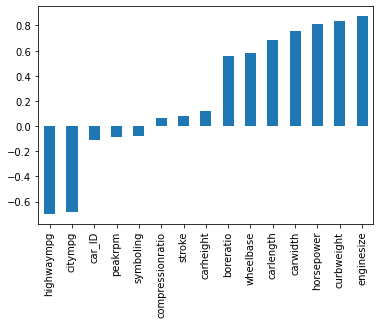

In [57]:
df2.corr()['price'].sort_values().drop('price').plot(kind='bar')

In [58]:
#df2.drop(columns = ['car_ID','CarName', 'peakrpm','symboling', 'compressionratio', 'stroke', 'carheight'], inplace= True)

In [59]:
df_new=df2[['car_ID', 'peakrpm','symboling', 'compressionratio', 'stroke', 'carheight','highwaympg','citympg','boreratio','wheelbase','carlength','carwidth','horsepower','enginesize','curbweight','price']]

In [60]:
cars=df_new.copy()

In [61]:
df2.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [62]:
#cars = pd.get_dummies(df2, columns=['symboling','fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'enginetype',	'cylindernumber',	'fuelsystem'])

In [63]:
cars.describe()

,car_ID,peakrpm,symboling,compressionratio,stroke,carheight,highwaympg,citympg,boreratio,wheelbase,carlength,carwidth,horsepower,enginesize,curbweight,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,5125.121951,0.834146,10.142537,3.255415,53.724878,30.751220,25.219512,3.329756,98.756585,174.049268,65.907805,104.117073,126.907317,2555.565854,13276.710571
std,59.322565,476.985643,1.245307,3.972040,0.313597,2.443522,6.886443,6.542142,0.270844,6.021776,12.337289,2.145204,39.544167,41.642693,520.680204,7988.852332
min,1.000000,4150.000000,-2.000000,7.000000,2.070000,47.800000,16.000000,13.000000,2.540000,86.600000,141.100000,60.300000,48.000000,61.000000,1488.000000,5118.000000
25%,52.000000,4800.000000,0.000000,8.600000,3.110000,52.000000,25.000000,19.000000,3.150000,94.500000,166.300000,64.100000,70.000000,97.000000,2145.000000,7788.000000
50%,103.000000,5200.000000,1.000000,9.000000,3.290000,54.100000,30.000000,24.000000,3.310000,97.000000,173.200000,65.500000,95.000000,120.000000,2414.000000,10295.000000
75%,154.000000,5500.000000,2.000000,9.400000,3.410000,55.500000,34.000000,30.000000,3.580000,102.400000,183.100000,66.900000,116.000000,141.000000,2935.000000,16503.000000
max,205.000000,6600.000000,3.000000,23.000000,4.170000,59.800000,54.000000,49.000000,3.940000,120.900000,208.100000,72.300000,288.000000,326.000000,4066.000000,45400.000000


In [64]:
cars.shape

(205, 16)

##Splitting into 50% for Training, 30% of Test, and 20% for validation

In [65]:
np.random.seed(11111)
msk = np.random.rand(len(cars)) <= 0.50
train_total = cars[msk]
temp = cars[~msk]
msk1 = np.random.rand(len(temp)) <= 0.60
test_total = temp[msk1]
val_total = temp[~msk1]

In [66]:
print(len(train_total),len(test_total),len(val_total))

99 68 38


In [67]:
print(len(cars))

205


In [68]:
print(train_total.dtypes)

car_ID                int64
peakrpm               int64
symboling             int64
compressionratio    float64
stroke              float64
carheight           float64
highwaympg            int64
citympg               int64
boreratio           float64
wheelbase           float64
carlength           float64
carwidth            float64
horsepower            int64
enginesize            int64
curbweight            int64
price               float64
dtype: object


In [69]:
train_label = train_total.loc[:,'price']
test_label = test_total.loc[:,'price']
val_label = val_total.loc[:,'price']

In [70]:
test_data= test_total.drop(columns = ['price'])
train_data= train_total.drop(columns = ['price'])
val_data= val_total.drop(columns = ['price'])

In [71]:
train_data.shape


(99, 15)

In [72]:
{train_data.columns.get_loc(c): c for idx, c in enumerate(train_data.columns)}

{0: 'car_ID',
 1: 'peakrpm',
 2: 'symboling',
 3: 'compressionratio',
 4: 'stroke',
 5: 'carheight',
 6: 'highwaympg',
 7: 'citympg',
 8: 'boreratio',
 9: 'wheelbase',
 10: 'carlength',
 11: 'carwidth',
 12: 'horsepower',
 13: 'enginesize',
 14: 'curbweight'}

In [73]:
mean = train_data.iloc[:,0:14].mean(axis=0) # taking the mean of 
train_data.iloc[:,0:14] -= mean
std = train_data.iloc[:,0:14].std(axis=0)
train_data.iloc[:,0:14] /= std
test_data.iloc[:,0:14] -= mean
test_data.iloc[:,0:14] /= std
val_data.iloc[:,0:14] -= mean
val_data.iloc[:,0:14] /= std

In [74]:
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label
val_label -= mean_label
val_label /= std_label

In [75]:
train = np.array(train_data.iloc[:]).astype(np.float32)
test = np.array(test_data.iloc[:]).astype(np.float32)
val = np.array(val_data.iloc[:]).astype(np.float32)

In [76]:
train.shape

(99, 15)

In [77]:
train_lab = np.array(train_label.astype(np.float32))
test_lab = np.array(test_label.astype('float32'))
val_lab = np.array(val_label.astype('float32'))

In [78]:
from keras import models
from keras import layers
def build_model(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError()])
  return model

In [79]:
# dropout model
from keras import regularizers
def build_model_drop(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [80]:
# Regularized model
from keras import regularizers
def build_model_regular(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(train.shape[1],)))
  model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [81]:
model1=build_model('relu')

In [82]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [83]:
train.reshape(99,15,1)

array([[[-1.5266631e+00],
        [-3.6672375e-01],
        [ 1.6501281e+00],
        ...,
        [ 1.8582125e-01],
        [ 1.4171742e-01],
        [ 2.5480000e+03]],

       [[-1.5106627e+00],
        [-3.6672375e-01],
        [ 3.2675806e-02],
        ...,
        [ 1.3372638e+00],
        [ 7.3873973e-01],
        [ 2.8230000e+03]],

       [[-1.4946623e+00],
        [ 7.3679149e-01],
        [ 8.4140199e-01],
        ...,
        [-5.5178363e-02],
        [-4.2816752e-01],
        [ 2.3370000e+03]],

       ...,

       [[ 1.6574137e+00],
        [ 5.1608843e-01],
        [-1.5847765e+00],
        ...,
        [ 2.6615447e-01],
        [ 4.4022858e-01],
        [ 2.9520000e+03]],

       [[ 1.7054149e+00],
        [-8.0812985e-01],
        [-1.5847765e+00],
        ...,
        [ 5.1932577e-02],
        [ 5.4877806e-01],
        [ 3.2170000e+03]],

       [[ 1.7214153e+00],
        [ 5.1608843e-01],
        [-1.5847765e+00],
        ...,
        [ 2.6615447e-01],
        [ 4.402

In [84]:
test.reshape(68,15,1)

array([[[-1.5426635e+00],
        [-3.6672375e-01],
        [ 1.6501281e+00],
        ...,
        [ 1.8582125e-01],
        [ 1.4171742e-01],
        [ 2.5480000e+03]],

       [[-1.3826597e+00],
        [ 1.3989006e+00],
        [ 8.4140199e-01],
        ...,
        [-8.1956096e-02],
        [-4.5530489e-01],
        [ 2.3950000e+03]],

       [[-1.3346585e+00],
        [-2.0219965e+00],
        [-7.7605039e-01],
        ...,
        [ 4.5359859e-01],
        [ 1.0643883e+00],
        [ 2.7650000e+03]],

       ...,

       [[ 1.6254129e+00],
        [-1.4602070e-01],
        [-2.3935027e+00],
        ...,
        [ 1.5514858e+00],
        [ 1.4171742e-01],
        [ 3.0450000e+03]],

       [[ 1.6734141e+00],
        [ 2.9538539e-01],
        [-1.5847765e+00],
        ...,
        [ 1.4979303e+00],
        [ 4.4022858e-01],
        [ 3.0490000e+03]],

       [[ 1.6894145e+00],
        [ 7.3679149e-01],
        [-1.5847765e+00],
        ...,
        [ 8.0170918e-01],
        [ 1.308

In [85]:
val.reshape(38,15,1)

array([[[-1.31865811e+00],
        [-2.02199650e+00],
        [ 3.26758064e-02],
        [-2.03468457e-01],
        [-2.97428995e-01],
        [ 9.38241720e-01],
        [-8.45181048e-01],
        [-7.62133420e-01],
        [-3.23101655e-02],
        [ 8.84558499e-01],
        [ 1.29749846e+00],
        [ 4.99616086e-01],
        [ 4.53598589e-01],
        [ 1.06438828e+00],
        [ 3.05500000e+03]],

       [[-1.25465655e+00],
        [-1.46020696e-01],
        [ 8.41401994e-01],
        [-5.11210263e-02],
        [-8.44297886e-01],
        [-1.14409342e-01],
        [ 3.37615585e+00],
        [ 3.37008309e+00],
        [-1.52008057e+00],
        [-1.73287320e+00],
        [-2.68881011e+00],
        [-2.58009291e+00],
        [-1.50117600e+00],
        [-1.73076165e+00],
        [ 1.48800000e+03]],

       [[-1.12665343e+00],
        [ 7.36791492e-01],
        [ 3.26758064e-02],
        [-8.15905109e-02],
        [-1.60711780e-01],
        [-1.20916641e+00],
        [ 1.11472535e+00

In [86]:
import numpy as np
history=model1.fit(
    train,
    train_lab,
    batch_size=1,
    epochs=100,
    validation_data=(val,val_lab)
)


Epoch 1/100
99/99 [==============================] - 1s 3ms/step - loss: 59762.7482 - mean_absolute_error: 218.8134 - val_loss: 1.8265 - val_mean_absolute_error: 1.0125
Epoch 2/100
99/99 [==============================] - 0s 2ms/step - loss: 6.3528 - mean_absolute_error: 1.7496 - val_loss: 19.3549 - val_mean_absolute_error: 3.8571
Epoch 3/100
99/99 [==============================] - 0s 2ms/step - loss: 16.6516 - mean_absolute_error: 2.8142 - val_loss: 1.3793 - val_mean_absolute_error: 0.9194
Epoch 4/100
99/99 [==============================] - 0s 2ms/step - loss: 13.9029 - mean_absolute_error: 2.9234 - val_loss: 4.5545 - val_mean_absolute_error: 1.6009
Epoch 5/100
99/99 [==============================] - 0s 2ms/step - loss: 11.5042 - mean_absolute_error: 2.5305 - val_loss: 3.2147 - val_mean_absolute_error: 1.2856
Epoch 6/100
99/99 [==============================] - 0s 2ms/step - loss: 13.1789 - mean_absolute_error: 2.7553 - val_loss: 6.1919 - val_mean_absolute_error: 2.0556
Epoch 7/100

In [87]:
model_reg=build_model_regular('relu')
history_reg=model_reg.fit(
    train,
    train_lab,
    batch_size=1,
    epochs=500,
    validation_data=(val,val_lab)
)


Epoch 1/500
99/99 [==============================] - 1s 4ms/step - loss: 6266.9633 - mae: 69.9649 - val_loss: 175.1797 - val_mae: 13.0498
Epoch 2/500
99/99 [==============================] - 0s 2ms/step - loss: 98.0881 - mae: 9.2004 - val_loss: 4.0186 - val_mae: 1.9161
Epoch 3/500
99/99 [==============================] - 0s 2ms/step - loss: 1.9130 - mae: 1.2000 - val_loss: 1.2753 - val_mae: 0.7996
Epoch 4/500
99/99 [==============================] - 0s 2ms/step - loss: 1.0457 - mae: 0.7935 - val_loss: 1.3778 - val_mae: 0.7516
Epoch 5/500
99/99 [==============================] - 0s 2ms/step - loss: 2.2248 - mae: 0.8548 - val_loss: 1.2340 - val_mae: 0.8228
Epoch 6/500
99/99 [==============================] - 0s 2ms/step - loss: 1.4317 - mae: 0.7933 - val_loss: 1.2234 - val_mae: 0.8407
Epoch 7/500
99/99 [==============================] - 0s 2ms/step - loss: 0.9177 - mae: 0.7526 - val_loss: 1.2212 - val_mae: 0.8091
Epoch 8/500
99/99 [==============================] - 0s 2ms/step - loss: 0.

In [88]:
model_dropout=build_model_drop('relu')
history_drop=model_dropout.fit(
    train,
    train_lab,
    batch_size=1,
    epochs=100,
    validation_data=(val,val_lab)
)

Epoch 1/100
99/99 [==============================] - 1s 3ms/step - loss: 111073.5021 - mae: 294.9619 - val_loss: 7446.0806 - val_mae: 84.2628
Epoch 2/100
99/99 [==============================] - 0s 2ms/step - loss: 13878.8183 - mae: 96.5364 - val_loss: 778.5697 - val_mae: 27.3612
Epoch 3/100
99/99 [==============================] - 0s 2ms/step - loss: 1490.8106 - mae: 29.2160 - val_loss: 21.2604 - val_mae: 4.5621
Epoch 4/100
99/99 [==============================] - 0s 2ms/step - loss: 1218.9791 - mae: 17.5690 - val_loss: 1.3546 - val_mae: 0.7436
Epoch 5/100
99/99 [==============================] - 0s 2ms/step - loss: 103.3161 - mae: 3.3540 - val_loss: 1.3622 - val_mae: 0.7388
Epoch 6/100
99/99 [==============================] - 0s 2ms/step - loss: 93.6151 - mae: 2.1763 - val_loss: 1.3672 - val_mae: 0.7358
Epoch 7/100
99/99 [==============================] - 0s 2ms/step - loss: 30.8396 - mae: 1.4472 - val_loss: 1.3698 - val_mae: 0.7343
Epoch 8/100
99/99 [==============================] 

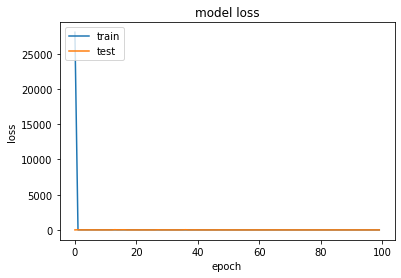

In [89]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

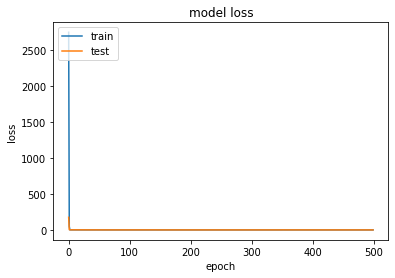

In [90]:
plt.plot(history_reg.history['loss'])
plt.plot(history_reg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

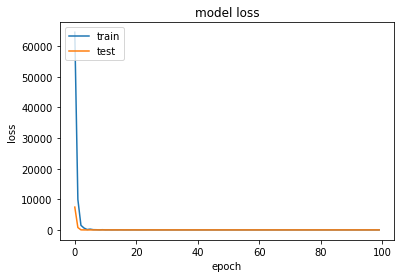

In [91]:
plt.plot(history_drop.history['loss'])
plt.plot(history_drop.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
test_mse_score, test_mae_score = model1.evaluate(test, test_lab)

3/3 [==============================] - 0s 5ms/step - loss: 0.5344 - mean_absolute_error: 0.6485


In [93]:
test_mse_score, test_mae_score = model_reg.evaluate(test, test_lab)

3/3 [==============================] - 0s 5ms/step - loss: 0.1744 - mae: 0.2425


In [94]:
test_mse_score, test_mae_score = model_dropout.evaluate(test, test_lab)

3/3 [==============================] - 0s 4ms/step - loss: 0.7184 - mae: 0.6156


In [95]:
x_1 = model1.predict(test[5].reshape(1,test.shape[1]))
x_1 * std_label + mean_label

array([[14224.863]], dtype=float32)

In [96]:
x_2 = model_reg.predict(test[5].reshape(1,test.shape[1]))
x_2 * std_label + mean_label

array([[8064.803]], dtype=float32)

In [97]:
x_3 = model_dropout.predict(test[5].reshape(1,test.shape[1]))
x_3 * std_label + mean_label

array([[13050.437]], dtype=float32)